In [10]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

from sklearn import *
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [6]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

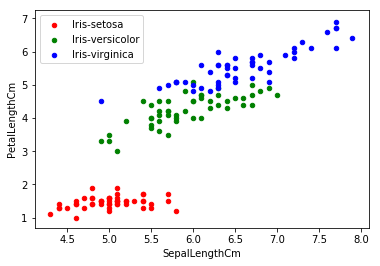

In [25]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot\
    .scatter(0, 1, color = colors[i], ax = ax, label = v)
#plt.legend()

In [17]:
X = preprocessing.StandardScaler().fit_transform(df[features].values)
pd.DataFrame(X)

,0,1
0,-0.900681,-1.341272
1,-1.143017,-1.341272
2,-1.385353,-1.398138
3,-1.506521,-1.284407
4,-1.021849,-1.341272
...,...,...
145,1.038005,0.819624
146,0.553333,0.705893
147,0.795669,0.819624
148,0.432165,0.933356


In [26]:
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [27]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 0, 4, 3, 4, 3, 0, 3, 4, 3, 3, 0, 0, 0, 3, 4,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 4, 4, 4, 0, 3, 3, 3, 3, 0, 3, 0, 4, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 0, 2, 4, 4, 2, 3, 2, 4, 2,
       4, 4, 4, 0, 0, 4, 4, 2, 2, 0, 4, 3, 2, 0, 4, 2, 0, 0, 4, 2, 2, 2,
       4, 0, 0, 2, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0], dtype=int32)

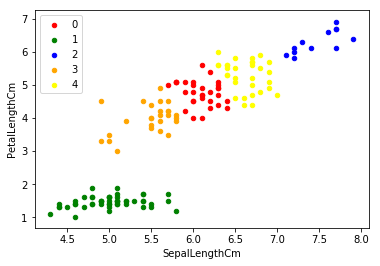

In [30]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue", "orange", "yellow"]
for i in range(k):
    df[y_pred == i][features].plot\
    .scatter(0, 1, ax = ax, color = colors[i], label = i)